In [1]:
# -*- coding: utf-8 -*-
# <nbformat>3.0</nbformat>

# <codecell>

# coding: utf-8
%matplotlib inline
import matplotlib
import scipy.integrate
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc ## desnecessário
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 18})

In [2]:
#Discret tempo
Tmax = 400
N = 4000

In [3]:
#Populações Iniciais
def init():
    
    #recurso difunde
    if d_r > 0:
        
        #Third Order        
        
        u10 = 2.0
        u20 = 0.0
        u30 = 2.0
        u40 = 0.0
        u50 = 2.0
        u60 = 0.0
        
        return u10, u20, u30, u40, u50, u60
        
        '''
        
        #First Order
    
        b10 = 1.0
        a10 = 1.0
        a20 = 1.0
        return b10, a10, a20
        
        '''
        
    
        #recurso não difunde
    elif d_r == 0:
    
        b10 = 2.0
        b20 = 0.0
        a10 = 1.0
        a20 = 1.0
        
        return b10, b20, a10, a20 

In [4]:
#lado direito das edos
def ddt(y, t):
    
    #recurso difunde
    if d_r > 0:

        
        U1 = y[0]
        U2 = y[1]
        U3 = y[2]
        U4 = y[3]
        U5 = y[4]
        U6 = y[5]
        
        #Third Order
        
        dU1dt = (4*(105*mu + 2*U2*(7*U3 - 27*U4 + 7*U5 - 27*U6)) - 
        7*U1*(15*d_r*np.pi + 15*phi*np.pi + 40*U3 - 8*U4 + 40*U5 - 8*U6))/(105.*np.pi)
        
        dU2dt = (12*(35*mu + 2*U1*(7*U3 - 27*U4 + 7*U5 - 27*U6)) - 
        U2*(2835*d_r*np.pi + 315*phi*np.pi + 648*U3 + 280*U4 + 648*U5 + 280*U6))/(315.*np.pi)
        
        dU3dt = (8*U4*(-7*U1 + 27*U2 + 7*alpha*U5 - 27*alpha*U6) - 
        7*U3*(15*np.pi + 15*d_1*np.pi - 40*U1 + 8*U2 + 40*alpha*U5 - 8*alpha*U6))/(105.*np.pi)
        
        dU4dt = -(24*U1*(7*U3 - 27*U4) + 315*np.pi*U4 + 2835*d_1*np.pi*U4 - 
        8*U2*(81*U3 + 35*U4) - 168*alpha*U3*U5 + 648*alpha*U4*U5 + 648*alpha*U3*U6 + 
        280*alpha*U4*U6)/(315.*np.pi)
         
        dU5dt = -(7*(15*d_2*np.pi + 15*m*np.pi - 40*gamma*m*U1 + 8*gamma*m*U2 - 40*alpha*beta*U3 + 8*alpha*beta*U4)*U5 + 
        8*(7*gamma*m*U1 - 27*gamma*m*U2 + 7*alpha*beta*U3 - 27*alpha*beta*U4)*U6)/(105.*np.pi)
         
        dU6dt = (-168*alpha*beta*U3*U5 + 648*alpha*beta*U4*U5 - 
        24*gamma*m*U1*(7*U5 - 27*U6) - 2835*d_2*np.pi*U6 - 315*m*np.pi*U6 + 648*alpha*beta*U3*U6 + 
        280*alpha*beta*U4*U6 + 8*gamma*m*U2*(81*U5 + 35*U6))/(315.*np.pi)
        
        return np.r_[dU1dt,dU2dt,dU3dt,dU4dt,dU5dt,dU6dt]
        
        '''
        #First Order
        
        B1 = y[0]
        A1 = y[1]
        A2 = y[2]
    
        dB1dt = 4*mu/np.pi - B1*(phi + 8*(A1+A2)/(3*np.pi) + d_r)
        dA1dt = A1*(8*B1/(3*np.pi) - 1 - alpha*8*A2/(3*np.pi) - d_1)
        dA2dt = A2*(8*m*gamma*B1/(3*np.pi) - m + 8*beta*alpha*A1/(3*np.pi) - d_2)
        
        return np.r_[dB1dt,dA1dt,dA2dt]
        
        '''
        
        
    #recurso não difunde
    
    elif d_r == 0:
        
        B1 = y[0]
        B2 = y[1]
        A1 = y[2]
        A2 = y[3]
        
        dB1dt = mu - phi*B1 - (32 - 3*np.pi**2)*(A1 + A2)*B2/(6*np.pi**2 - 48)
        dB2dt = - phi*B2 + (A1 + A2)*(B1 - B2*4*np.pi/(6*np.pi**2 - 48))
        dA1dt = A1*(B1 - (1 + d_1) - 8*B2/(3*np.pi) - alpha*8*A2/(3*np.pi))
        dA2dt = A2*(m*gamma*(B1 - 8*B2/(3*np.pi)) - (m + d_2) + alpha*8*beta*A1/(3*np.pi))
    
    
        return np.r_[dB1dt,dB2dt,dA1dt,dA2dt]

In [5]:
#Funções que calculam os mu_i
def mu_1():
    #R Difunde: R = B1*sin(x) 
    if d_r > 0:
        return 3*(np.pi**2)*(phi+d_r)*(1+d_1)/32
    elif d_r == 0:
        return phi*(1+d_1)

def mu_2():
    #R Difunde: R = B1*sin(x) 
    if d_r > 0:
        return (3*np.pi**2)*(m + d_2 - m*gamma*(1+d_1))*(1+d_1)/(32*beta*alpha) + (3*np.pi**2)*(phi+d_r)*(1+d_1)/32
        #return (3*np.pi**2)*(1 + d_1)*(d_2 + m + beta*alpha*(phi + d_r) - m*gamma*(1+d_1))/(32*beta*alpha)

def mu_3():
    #R Difunde: R = B1*sin(x) 
    if d_r > 0:
        return (3*np.pi**2)*(m + d_2)*((m+d_2)/(m*gamma) - 1 - d_1)/(32*m*gamma*alpha) + (3*np.pi**2)*(m + d_2)*(phi+d_r)/(32*m*gamma)

In [48]:
#Integre aqui
DR = 1.0
D1 = 1.0
D2 = 5.0
l = 0.5 + 30*0.0125

d_1 = D1/(l**2) #O Numerador é o D do modelo antes de adimensionalizar!
d_2 = D2/(l**2)
d_r = DR/(l**2)

mu = 15
m = 1.0
gamma = 0.5
alpha = 1
beta = 8
phi = 1.0
t = np.linspace(0,Tmax,N)
#pop inicial
if d_r > 0:
    
    #Third Order
    
    U10,U20,U30,U40,U50,U60 = init()
    y0 = np.r_[U10,U20,U30,U40,U50,U60]
    
    '''
    #First Order
    B10,A10,A20 = init()
    y0 = np.r_[B10,A10,A20]
    
    '''

elif d_r == 0:
    B10,B20,A10,A20 = init()
    y0 = np.r_[B10,B20,A10,A20]
    
sol = scipy.integrate.odeint(ddt,y0,t)
sol = np.array(sol)

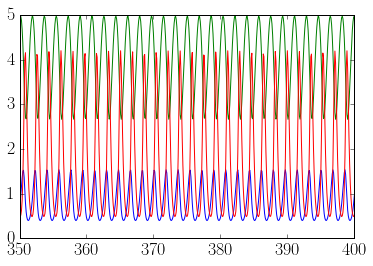

In [49]:
DR = 1.0
D1 = 1.0
D2 = 5.0
l = 0.5 + 30*0.0125
alpha = 1.0
beta = 8
gamma = 0.5
phi = 1.0
mu = 15

#sol = np.load('Var_Method_IGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f.npy'
        #% (l,DR,D1,D2,mu,gamma,beta))
if DR > 0:
    
    #Third Order
    
    U1 = sol[:,0]
    U2 = sol[:,1]
    U3 = sol[:,2]
    U4 = sol[:,3]
    U5 = sol[:,4]
    U6 = sol[:,5]
    
    plt.plot(t[-500:],U1[-500:] - U2[-500:], color = 'green')
    plt.plot(t[-500:],U3[-500:] - U4[-500:], color = 'blue')
    plt.plot(t[-500:],U5[-500:] - U6[-500:], color = 'red')
    
    '''
    #First Order
    
    B1B2 = sol[:,0]
    A1 = sol[:,1]
    A2 = sol[:,2]
    plt.plot(t[-500:],B1B2[-500:], color = 'green')
    plt.plot(t[-500:],A1[-500:], color = 'blue')
    plt.plot(t[-500:],A2[-500:], color = 'red')
    #plt.axis([0,Tmax,0,20])
    
    '''
    
            
if DR == 0:
    B1 = sol[:,0]
    B2 = sol[:,1]            
    A1 = sol[:,2]
    A2 = sol[:,3]
    plt.plot(t[-500:],B1[-500:] - B2[-500:], color = 'green')
    plt.plot(t[-500:],A1[-500:], color = 'blue')
    plt.plot(t[-500:],A2[-500:], color = 'red')
    #plt.axis([0,Tmax,0,20])

In [18]:
#Faça para vários dR, d1, d2
DR = [0]
D1 = [7]
D2 = [3]
MU = [0.0 + i for i in range(0,140)]
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 1
phi = 1.0
#pop inicial
for d_r in DR:
    print("d_r = " + str(d_r))
    for d_1 in D1:
        print("d_1 = " + str(d_1))
        for d_2 in D2:
            print("d_2 = " + str(d_2))
            for mu in MU:
                print("mu = " + str(mu))
                B10,B20,A10,A20 = init()
                y0 = np.r_[B10,B20,A10,A20]
                sol = scipy.integrate.odeint(ddt,y0,t)
                sol = np.array(sol)
                np.save('Var_Method_IGP_dR=%.3f,d1=%.3f,d2=%.3f,mu=%.3f,alpha=%.3f,gamma=%.3f,beta=%.f,phi=%.3f,m=%.3f'
                        % (d_r,d_1,d_2,mu,alpha,gamma,beta,phi,m),sol)

d_r = 0
d_1 = 7
d_2 = 3
mu = 0.0
mu = 1.0
mu = 2.0
mu = 3.0
mu = 4.0
mu = 5.0
mu = 6.0
mu = 7.0
mu = 8.0
mu = 9.0
mu = 10.0
mu = 11.0
mu = 12.0
mu = 13.0
mu = 14.0
mu = 15.0
mu = 16.0
mu = 17.0
mu = 18.0
mu = 19.0
mu = 20.0
mu = 21.0
mu = 22.0
mu = 23.0
mu = 24.0
mu = 25.0
mu = 26.0
mu = 27.0
mu = 28.0
mu = 29.0
mu = 30.0
mu = 31.0
mu = 32.0
mu = 33.0
mu = 34.0
mu = 35.0
mu = 36.0
mu = 37.0
mu = 38.0
mu = 39.0
mu = 40.0
mu = 41.0
mu = 42.0
mu = 43.0
mu = 44.0
mu = 45.0
mu = 46.0
mu = 47.0
mu = 48.0
mu = 49.0
mu = 50.0
mu = 51.0
mu = 52.0
mu = 53.0
mu = 54.0
mu = 55.0
mu = 56.0
mu = 57.0
mu = 58.0
mu = 59.0
mu = 60.0
mu = 61.0
mu = 62.0
mu = 63.0
mu = 64.0
mu = 65.0
mu = 66.0
mu = 67.0
mu = 68.0
mu = 69.0
mu = 70.0
mu = 71.0
mu = 72.0
mu = 73.0
mu = 74.0
mu = 75.0
mu = 76.0
mu = 77.0
mu = 78.0
mu = 79.0
mu = 80.0
mu = 81.0
mu = 82.0
mu = 83.0
mu = 84.0
mu = 85.0
mu = 86.0
mu = 87.0
mu = 88.0
mu = 89.0
mu = 90.0
mu = 91.0
mu = 92.0
mu = 93.0
mu = 94.0
mu = 95.0
mu = 96.0
mu = 97.0
mu = 9

[0, 140, 0, 20]

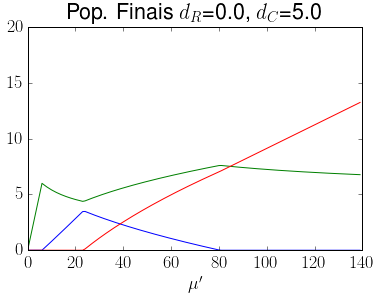

In [21]:
#Imprima a população final
DR = [0]
D1 = [5]
D2 = [5]
MU = [0.0 + i for i in range(0,140)]
m = 1.0
gamma = 0.5
alpha = 1
beta = 1
phi = 1.0

Bfinal = []
A1final = []
A2final = []
t = np.linspace(0,Tmax,N)
for d_r in DR:
    for d_1 in D1:
        for d_2 in D2:
            for mu in MU:
                sol = np.load('Var_Method_IGP_dR=%.3f,d1=%.3f,d2=%.3f,mu=%.3f,alpha=%.3f,gamma=%.3f,beta=%.f,phi=%.3f,m=%.3f.npy'
                              % (d_r,d_1,d_2,mu,alpha,gamma,beta,phi,m))
                B1 = np.transpose(sol[:,0])
                B2 = np.transpose(sol[:,1])
                A1 = np.transpose(sol[:,2])
                A2 = np.transpose(sol[:,3])
                Bfinal.append(B1[-1] - B2[-1])
                A1final.append(A1[-1])
                A2final.append(A2[-1])

plt.plot(MU,Bfinal, color = 'green', label = r'$B_1 - B_2$')
plt.plot(MU,A1final,color = 'blue', label = r'$A_1$')
plt.plot(MU,A2final,color = 'red', label = r'$A_2$')
plt.xlabel(r"$\mu'$")
#plt.legend(loc = 'best')
plt.title(r'Pop. Finais $d_R$=%.1f, $d_C$=%.1f' % (d_r,d_1))
plt.axis([0,140,0,20])

In [174]:
d_r = 5
d_1 = 12
d_2 = 5
print(mu_1(),mu_2(),mu_3())

(72.17148218296593, 66.15719200105211, 55.51652475612765)


In [6]:
#Oscilações x L
#Gera os dados para fazer o gráfico L x mu
#L' = sqrt(m1)*(L/pi)
Nl = 100
L = [0.5 + 0.0125*j for j in range(0,Nl)]
mu = 15
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 8
phi = 1.0
D = [[1.0,5.0,1.0]]

for d in D:
    print("D = " + str(d))
    D1,D2,DR = d[0],d[1],d[2]
    for l in L:
        
        print(l)
        
        d_1 = D1/(l**2) #O Numerador é o D do modelo antes de adimensionalizar!
        d_2 = D2/(l**2)
        d_r = DR/(l**2)
        
        if d_r > 0:
            
            #Third Order
    
            U10,U20,U30,U40,U50,U60 = init()
            y0 = np.r_[U10,U20,U30,U40,U50,U60]
    
            '''
            #First Order
            
            B10,A10,A20 = init()
            y0 = np.r_[B10,A10,A20] #d_r > 0
            
            '''
        
        if d_r == 0:
            B10,B20,A10,A20 = init()
            y0 = np.r_[B10,B20,A10,A20] #d_r = 0
        
        sol = scipy.integrate.odeint(ddt,y0,t)
        sol = np.array(sol)
        
        #First order
        
        #np.save('Var_Method_IGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f'
                #% (l,DR,D1,D2,mu,gamma,beta),sol)
            
        #Third order
        
        np.save('Var_Method_IGP3_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f'
                % (l,DR,D1,D2,mu,gamma,beta),sol)

D = [1.0, 5.0, 1.0]
0.5
0.5125
0.525
0.5375
0.55
0.5625
0.575
0.5875
0.6
0.6125
0.625
0.6375
0.65
0.6625
0.675
0.6875
0.7
0.7125
0.725
0.7375
0.75
0.7625
0.775
0.7875
0.8
0.8125
0.825
0.8375
0.85
0.8625
0.875
0.8875
0.9
0.9125
0.925
0.9375
0.95
0.9625
0.975
0.9875
1.0
1.0125
1.025
1.0375
1.05
1.0625
1.075
1.0875
1.1
1.1125
1.125
1.1375
1.15
1.1625
1.175
1.1875
1.2
1.2125
1.225
1.2375
1.25
1.2625
1.275
1.2875
1.3
1.3125
1.325
1.3375
1.35
1.3625
1.375
1.3875
1.4
1.4125
1.425
1.4375
1.45
1.4625
1.475
1.4875
1.5
1.5125
1.525
1.5375
1.55
1.5625
1.575
1.5875
1.6
1.6125
1.625
1.6375
1.65
1.6625
1.675
1.6875
1.7
1.7125
1.725
1.7375


D = [1.0, 5.0, 1.0]


"\n#First order\n\nplt.plot(L,B1B2MAX,color = 'green')\nplt.plot(L,B1B2MIN,color = 'green')\nplt.plot(L,A1MAX,color = 'blue')\nplt.plot(L,A1MIN,color = 'blue')\nplt.plot(L,A2MAX,color = 'red')\nplt.plot(L,A2MIN,color = 'red')\n"

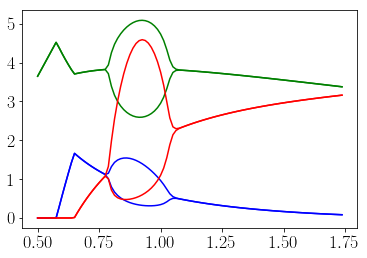

In [8]:
#Leia os dados e gere o gráfico Pop x L
Nl = 100
L = [0.5 + 0.0125*j for j in range(0,Nl)]
mu = 15
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 8
phi = 1.0
D = [[1.0,5.0,1.0]]

#Third order

U1U2MAX = []
U1U2MIN = []
U3U4MAX = []
U3U4MIN = []
U5U6MAX = []
U5U6MIN = []

'''
#First order

B1B2MAX = []
B1B2MIN = []
A1MAX = []
A1MIN = []
A2MAX = []
A2MIN = []
'''


for d in D:
    print("D = " + str(d))
    D1,D2,DR = d[0],d[1],d[2]
    for l in L:
        #Third order
        
        sol = np.load('Var_Method_IGP3_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f.npy'
                % (l,DR,D1,D2,mu,gamma,beta))
        
        '''
        #First order
        
        sol = np.load('Var_Method_IGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f.npy'
                % (l,DR,D1,D2,mu,gamma,beta))
         '''       
        
        if DR > 0:
            
            '''
            #First order
            
            B1B2 = sol[:,0]
            A1 = sol[:,1]
            A2 = sol[:,2]
            B1B2MAX.append(np.max(B1B2[-500:]))
            B1B2MIN.append(np.min(B1B2[-500:]))
            A1MAX.append(np.max(A1[-500:]))
            A1MIN.append(np.min(A1[-500:]))
            A2MAX.append(np.max(A2[-500:]))
            A2MIN.append(np.min(A2[-500:]))

            '''
            #Third order
            U1 = sol[:,0]
            U2 = sol[:,1]
            U3 = sol[:,2]
            U4 = sol[:,3]
            U5 = sol[:,4]
            U6 = sol[:,5]
            U1U2MAX.append(np.max(U1[-1000:] - U2[-1000:]))
            U1U2MIN.append(np.min(U1[-1000:] - U2[-1000:]))
            U3U4MAX.append(np.max(U3[-1000:] - U4[-1000:]))
            U3U4MIN.append(np.min(U3[-1000:] - U4[-1000:]))
            U5U6MAX.append(np.max(U5[-1000:] - U6[-1000:]))
            U5U6MIN.append(np.min(U5[-1000:] - U6[-1000:]))
            
        if DR == 0:
            B1 = sol[:,0]
            B2 = sol[:,1]            
            A1 = sol[:,2]
            A2 = sol[:,3]
            B1B2MAX.append(np.max(B1[-1000:]-B2[-1000:]))
            B1B2MIN.append(np.min(B1[-1000:]-B2[-1000:]))
            A1MAX.append(np.max(A1[-1000:]))
            A1MIN.append(np.min(A1[-1000:]))
            A2MAX.append(np.max(A2[-1000:]))
            A2MIN.append(np.min(A2[-1000:]))
            
#Third order

plt.plot(L,U1U2MAX,color = 'green')
plt.plot(L,U1U2MIN,color = 'green')
plt.plot(L,U3U4MAX,color = 'blue')
plt.plot(L,U3U4MIN,color = 'blue')
plt.plot(L,U5U6MAX,color = 'red')
plt.plot(L,U5U6MIN,color = 'red')
            
'''
#First order

plt.plot(L,B1B2MAX,color = 'green')
plt.plot(L,B1B2MIN,color = 'green')
plt.plot(L,A1MAX,color = 'blue')
plt.plot(L,A1MIN,color = 'blue')
plt.plot(L,A2MAX,color = 'red')
plt.plot(L,A2MIN,color = 'red')
'''